# Project: TMDb movie data


## Introduction
This is a dataset about the movie database(TMDb) and it contains data about movies, in this project I will explore and analyze this dataset after I clean it.

after I clean the dataset I will answer some questions:
- what are the most and the least genres in this movies dataset?
- which year has the most movies in the last 20 years?
- which years has the most average revenue from the movies in the last 30 years?
- what is the average budget for all movies ?

I will start by loading my dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

mv = pd.read_csv('Desktop/movies_data.csv')

now I will explore the dataset

In [4]:
mv.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# let's use info() to see the number of columns and row and to see the data types
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The dataset
for this dataset there are 21 columns and 10866 rows

but there are some columns that we don't need, so first I will drop these columns then I will clean the rest of the columns by drop the rows that contains a missing data.

# Data Wrangling

now we will start cleaning the data by trim the columns that we don't need for our analysis

In [6]:
mv.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average', 'release_date', 'budget_adj', 'revenue_adj'],axis=1,inplace=True)

In [7]:
# checking the number of columns and rows
mv.shape

(10866, 10)

In [8]:
# I will use describe() to see some statistics like mean, count, etc..
mv.describe()

,id,popularity,budget,revenue,runtime,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [9]:
# and now this is our dataset after the trim
mv.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


### Missing data

now let's check if there is missing data

In [10]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_year          10866 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 849.0+ KB


### Drop the missing data

we can notice here that there is missing data in 3 columns:

director column, genres column, and production_companies column.

Since all of these columns are string we will have to drop all the rows that have missing data

In [11]:
mv.dropna(inplace=True)
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_year          9807 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 842.8+ KB


### Duplicate data
we will check if there is a duplicate data then remove it

In [12]:
mv.duplicated().sum()

1

In [13]:
# removing the duplicate data
mv.drop_duplicates(inplace=True)

after we removed the duplicate data let's check

In [14]:
# looking good
mv.duplicated().sum()

0

## Exploratory Data Analysis

now we will explore our dataset after we cleaned it

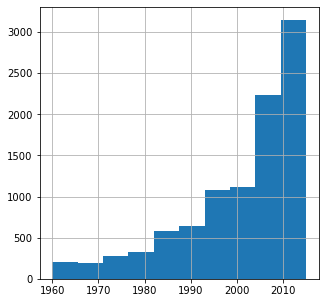

In [130]:
# I will use histogram for release_year column
mv['release_year'].hist(figsize=(5,5));

### Q1 What are the most and the least genres in this movies dataset?


### Split the genres
to answer this question, I will need to make a function to split the genres so that I can make a visualization for each genre

In [15]:
# I will make function to split the genres
def split(column):
    # first I will make a new column and I will call it sd and I will split the strings with |
    sd = mv[column].str.cat(sep = '|')
    # now split the values
    sd = pd.Series(sd.split('|'))
    # finally I will arrange it and make it decending
    sd = sd.value_counts(ascending = False)
    # return the value
    return sd

Now we can use this function to split the genres

In [16]:
# I will use the genre column in my new function to split the genres
split('genres')

Drama              4369
Comedy             3438
Thriller           2747
Action             2235
Romance            1570
Horror             1526
Adventure          1385
Crime              1299
Science Fiction    1137
Family             1103
Fantasy             842
Mystery             773
Animation           637
Music               341
Documentary         331
History             308
War                 259
Western             160
TV Movie            132
Foreign             120
dtype: int64

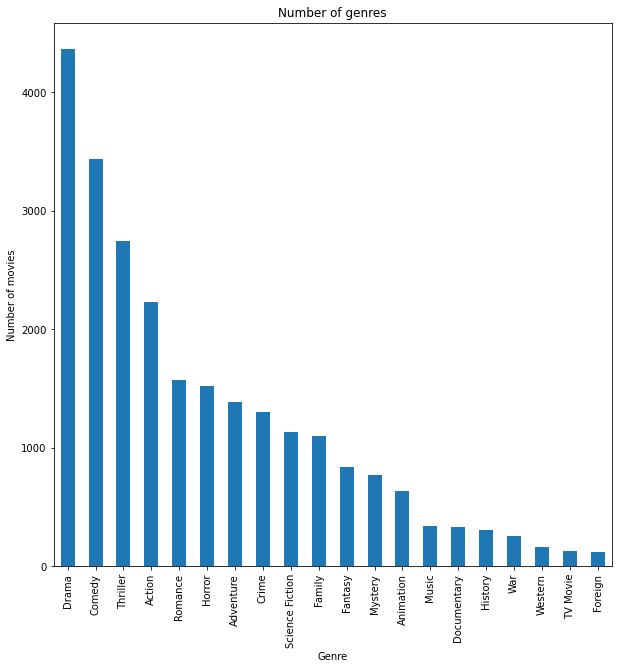

In [17]:
# I will use the split function to split all the genres then visualize the genres using bar chart
split('genres').plot(kind='bar',figsize=(10,10), title='Number of genres',xlabel='Genre',ylabel='Number of movies');

### The Answer
we can see here that Drama genre is the most genres in the dataset with 4369 movies, then the Comedy is the second with 3438,

and the least genre is Foreign genre with only 120 movies.

### Q2 Which year has the most movies in the last 20 years?

we can answer this question by create a bar chart and use value_counts to get the number of movies for each year

In [18]:
# first we will see the numbers of movies for the last 20 years
mv.release_year.value_counts().head(20)

2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
2005    324
2003    254
2004    253
2002    243
2001    212
1999    212
2000    197
1996    196
1998    191
1997    180
Name: release_year, dtype: int64

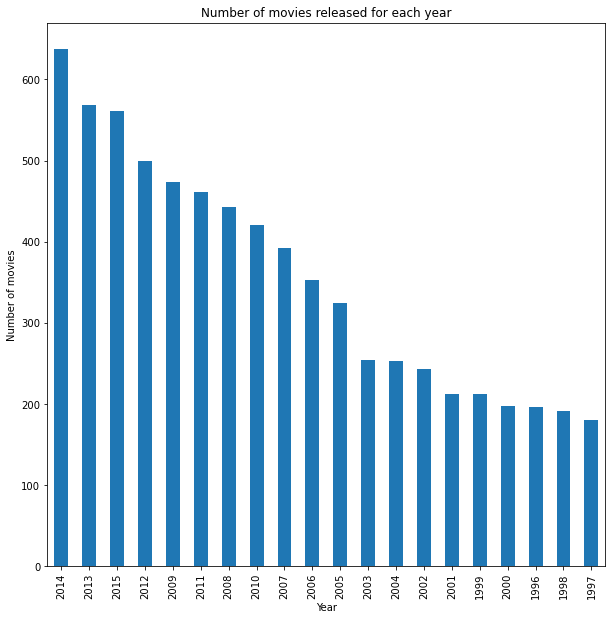

In [19]:
# we will make a bar chart to represent the number of movies for the last 20 years
mv.release_year.value_counts().head(20).plot(kind='bar',figsize=(10,10), title='Number of movies released for each year',xlabel='Year',ylabel='Number of movies');

### Answer
we can see that 2014 has the most number of movies with 638 movies, then 2013 with 568, and the least year is 1997 with only 180 movies

### Q3 Which year has the most average revenue from the movies in the last 30 years?
to answer this question we need to create a line chart that represents the average revenues for the last 30 years

In [20]:
# first let's see the average revenue in the last 30 years
mv.groupby('release_year')['revenue'].mean().tail(30)

release_year
1986    2.725516e+07
1987    3.036934e+07
1988    2.811249e+07
1989    4.003817e+07
1990    4.210070e+07
1991    3.765280e+07
1992    4.785947e+07
1993    4.041967e+07
1994    4.075332e+07
1995    5.380743e+07
1996    4.236664e+07
1997    5.919389e+07
1998    4.965375e+07
1999    5.356468e+07
2000    5.542650e+07
2001    6.301777e+07
2002    6.014920e+07
2003    5.956347e+07
2004    6.619554e+07
2005    5.094229e+07
2006    4.603824e+07
2007    4.949938e+07
2008    4.356426e+07
2009    4.678309e+07
2010    5.215121e+07
2011    5.138551e+07
2012    4.926744e+07
2013    4.348731e+07
2014    3.813424e+07
2015    4.770040e+07
Name: revenue, dtype: float64

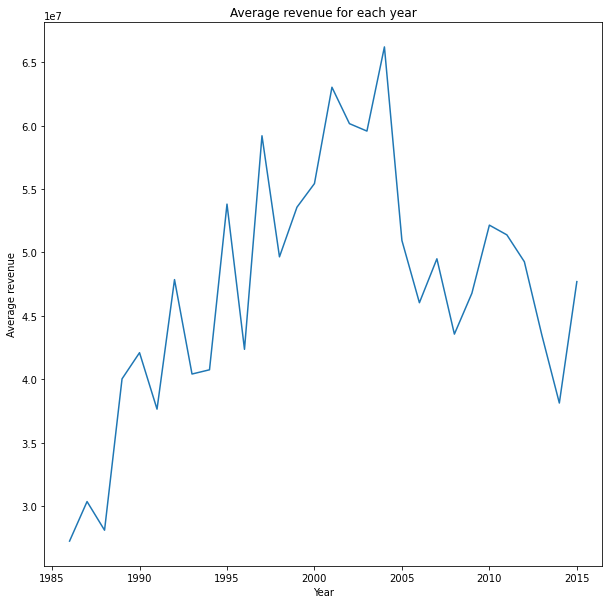

In [21]:
# I will use groupby and mean() function to make a line chart that represents the average revenues for the last 30 years
mv.groupby('release_year')['revenue'].mean().tail(30).plot(kind='line', figsize=(10,10), title='Average revenue for each year', xlabel='Year', ylabel='Average revenue');

### Answer
according to this chart the most average revenue was in 2004 with 6.619554e+07 then 2001 with 6.301777e+07
and the least year was 1986 with only 2.725516e+07

### Q4 What is the average budget for all movies?
we can answer this question by using mean function

In [123]:
mv.budget.mean()

16125246.91495003

### Answer
we can see here that the average budget for all movies is 16125246.91495003

### Q5 is there any kind of association between the Popularity and Revenue?

to answer this question I will need to make a scatter plot to see if there is any association between popularity and revenue

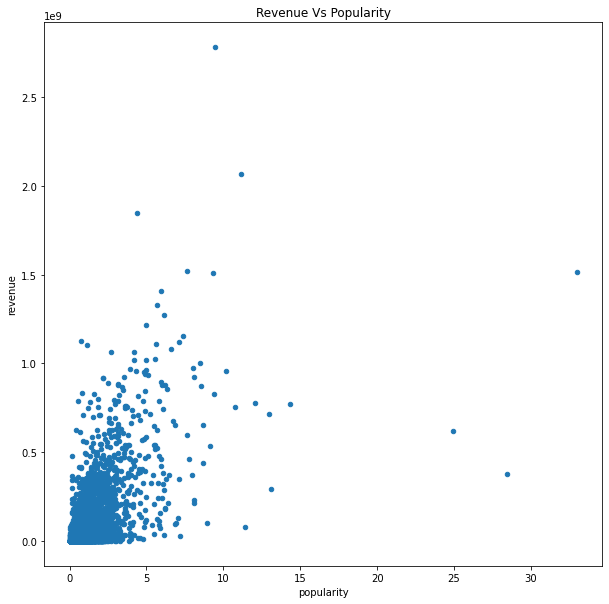

In [120]:
# I will make a scatter to see the correlation kind between popularity and revenue
mv.plot(x='popularity', y='revenue', kind='scatter', figsize=(10,10), title='Revenue Vs Popularity');

### Answer
according to this scatter plot there is a positive correlation between the the revenue and the popularity
this means if the popularity increased the revenue will increase too.

## Conclusion
After I analyzed the dataset, this is my findings.

- Drame genre is the most genre in the movies dataset with 4369 that have Drama genre and the least genre is Foreign genre with only 120 movies.

- Year 2014 has the most number of movies released with 638 movies, while year 1997 has the least number of movies with only 180 movies.

- The most average movies revenue was in 2004 with 6.619554e+07 while the least year was 1986 with only 2.725516e+07.

- The average budget of all movies is 16125246.91495003

- There is a positive correlation between the popularity and revenue which means that they are associated.

### Limitations
- There was a missing data in the dataset but the problem has been solved by dropping the missing data.